In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

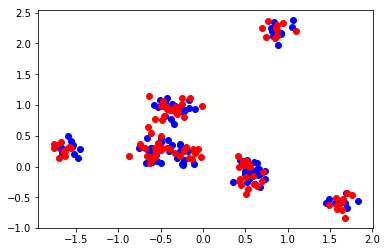

In [97]:
num_dims  =  2
num_centroids = 10
num_samples = 100
num_batch = 32

data_points = []
test_points = []

for i in range(num_dims):
    centroids = np.random.normal(0, 1, [num_centroids, 1])
    
    samples = centroids + np.random.normal(
        0, 0.1, [num_centroids, num_samples // num_centroids])
    tests = centroids + np.random.normal(
        0, 0.1, [num_centroids, num_samples // num_centroids])
    
    data_points.append(samples.flatten())
    test_points.append(tests.flatten())
    
data_points = np.stack(data_points).T
test_points = np.stack(test_points).T

plt.plot(data_points[:, 0], data_points[:, 1], "bo")
plt.plot(test_points[:, 0], test_points[:, 1], "ro")

In [98]:
print(data_points.shape)

(100, 2)


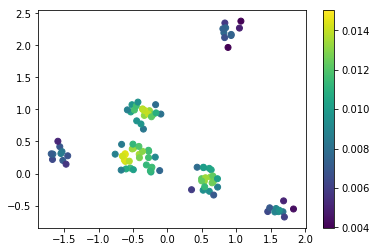

In [105]:
def get_density(test_data, train_data):
    test_data = test_data[:, np.newaxis, :]
    train_data = train_data[np.newaxis, :, :]
    offsets = test_data - train_data
    distances = np.sum(np.square(offsets), axis=2)
    densities = np.mean(1/(distances + 1e-2), axis=1)
    return densities / np.sum(densities)

#plt.scatter(test_points[:, 0], test_points[:, 1], c=get_density(test_points, data_points))
plt.scatter(data_points[:, 0], data_points[:, 1], c=get_density(data_points, data_points))
plt.colorbar()